# Danger of P-Value Mining

There are many forms of **p-value mining**. One temptation is to continue to collect data until the sample appears large enough to give a significant result. In this exercise you will explore the perils of this approach. 

To get started, execute the code in the cell below to import the required packages. 

In [13]:
import numpy as np
import numpy.random as nr
import pandas as pd
import statsmodels.api as sm

## matplotlib with display of graphs inline
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

The code in the cell below simulates two independently distributed random variables (no correlation) with a sample size of 700 each. Execute this code.  

In [14]:
nr.seed(560)
covariance = np.array([[10.0,0.0],[0.0,5.0]])
uncorrelated_data = nr.multivariate_normal(mean=[0.0,0.0], cov=covariance, size=700)
uncorrelated_data

array([[-1.49414729,  1.19658562],
       [-1.21753804, -3.08415743],
       [-1.03149055, -0.40644755],
       ...,
       [-5.77445249, -1.09812346],
       [-3.26598419,  3.40412339],
       [ 0.19057516,  1.62350816]])

You can test the relationship between these two variables with a linear model. Execute the code in the cell below to compute a linear model of one variable regressed on the other and then display the summary. 

In [15]:
uncorrelated_OLS_model = sm.OLS(uncorrelated_data[:,0],uncorrelated_data[:,1]).fit()
print(uncorrelated_OLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.607
Date:                Tue, 04 Feb 2020   Prob (F-statistic):                       0.205
Time:                        08:48:22   Log-Likelihood:                         -1804.3
No. Observations:                 700   AIC:                                      3611.
Df Residuals:                     699   BIC:                                      3615.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As expected the slope coefficient shows no effect, as it is zero. You can see this by noticing that the confidence interval of the slope coefficient spans zero. Further, the adjusted R-squared value is essentially zero. 

Execute the code in the cell below and examine the resulting plot.

C:\Users\StevePC2\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


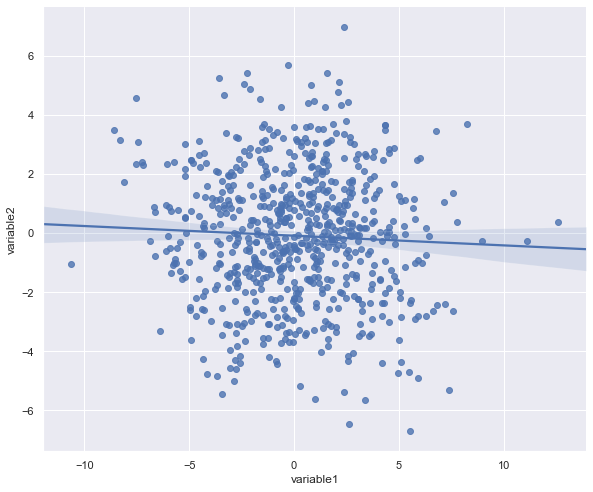

In [16]:
data_frame = pd.DataFrame(uncorrelated_data, columns=['variable1','variable2'])

sns.set(color_codes=True)
g = sns.lmplot(x='variable1', y='variable2', data=data_frame, size=7, aspect = 1.2)

Examine the plot. The confidence interval of the best-fit regression line contains the zero effect (zero slope) case indicating that there is no relationship between these variables. 

Having confirmed that there is no significant relationship between the two variables, let's see what happens when we randomly sample from these data. The code in the cell below samples increasing numbers of cases (rows) from the data set, computes an ordinary least squares model for each sample, and appends the resulting p-value and slope coefficient to lists. Execute this code.

In [17]:
indx_base = range(700)
slopes=[]
numbers=[]
p_values=[]
for i in range(6,500):
    temp_model = sm.OLS(uncorrelated_data[:i,0],uncorrelated_data[:i,1]).fit()
    slopes.append(temp_model._results.params[0])
    p_values.append(temp_model._results.pvalues[0])
    numbers.append(i)

We know that the actual slope coefficient should be close (indistinguishable) from zero. But, is the always the case as an increasing number of cases from the data set are sampled? To find out, execute the code in the cell below to plot the slope coefficient vs. the sample size. 

Text(0, 0.5, 'slope')

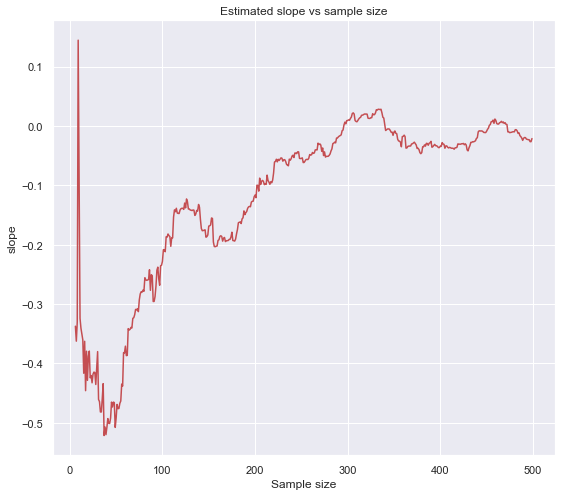

In [18]:
## Plot slopes vs. sample size
fig, ax = plt.subplots(figsize=(9,8))
ax.plot(numbers, slopes, 'r')
ax.set_title('Estimated slope vs sample size') # Give the plot a main title
ax.set_xlabel('Sample size') # Set text for the x axis
ax.set_ylabel('slope') # Set text for y axis

The resulting plot has the look of a random walk. With increasing sample size the slope coefficient does approach the expected value of 0, there are some significant deviations along the way. In other words, random sampling of the data set can produce effects that might seem far from zero. 

What about the p-values of the slope coefficient? How does the apparent significance change as the data are randomly sampled? To find out, create and execute code in the cell below to plot the p-value vs. the sample size and examine the result. 

In [19]:
## Plot p-values vs. sample size


Does the chart resembles a random walk again? At some sample sizes do the p-values indicate possible false significance?

##### Copyright 2020, Stephen F Elston. All rights reserved. 